### Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

#### 1.1. Скачать данные по ссылке

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости

In [43]:
df['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

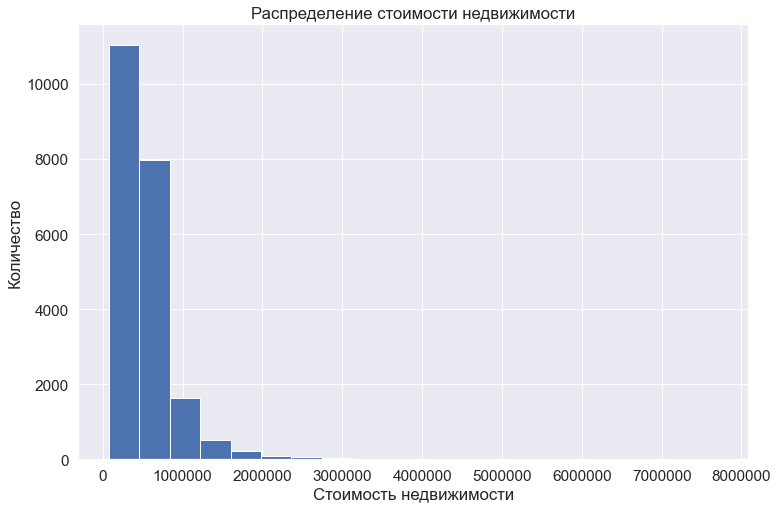

In [44]:
plt.figure(figsize=(12, 8))

plt.hist(df['price'], bins=20)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain');

Посмотрим прицельно интервал с распределением стоимости домов менее 4000000.

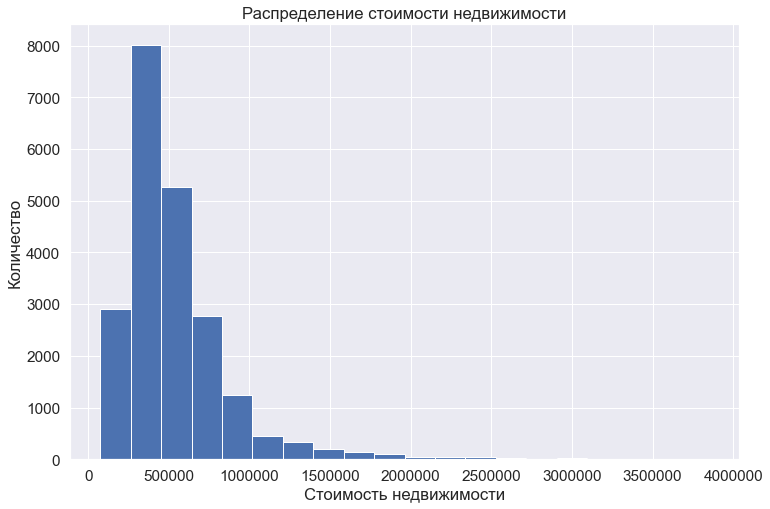

In [45]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['price'] < 4000000]['price'], bins=20)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain');

Можно сделать вывод, что абсолютное большинство домов имеют стоимость менее 1000000.

#### 1.3 Изучите распределение квадратуры жилой

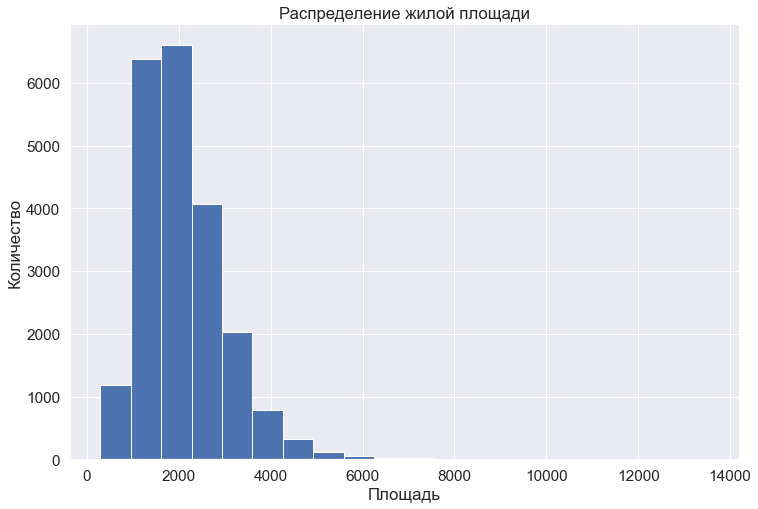

In [46]:
plt.figure(figsize=(12, 8))
plt.hist(df['sqft_living'], bins=20)

plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество');

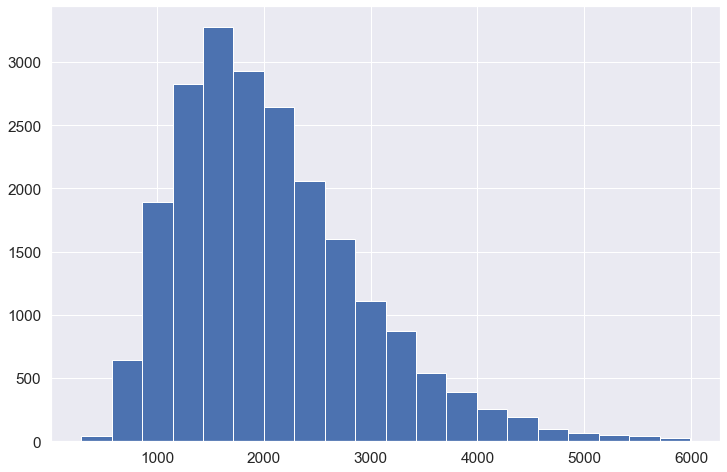

In [47]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['sqft_living'] < 6000]['sqft_living'], bins=20);

Жилая площадь абсолютного большинства домов находится в пределах от 1000 до 3000.

#### 1.4 Изучите распределение года постройки

In [48]:
data = df.groupby('yr_built')['yr_built'].agg(count='count').reset_index().sort_values(by='yr_built')
data.head()

,yr_built,count
0,1900,87
1,1901,29
2,1902,27
3,1903,46
4,1904,45


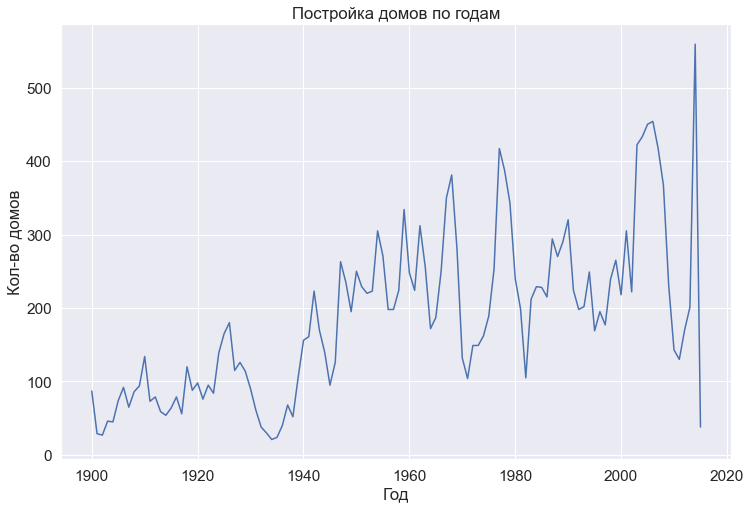

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(data['yr_built'], data['count'])

plt.title('Постройка домов по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во домов');

### Условие 2: 2 задача
#### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [50]:
data = df['waterfront'].value_counts().reset_index()
data.replace({0: 'no', 1: 'yes'}, inplace=True)
data.head()

,index,waterfront
0,no,21450
1,yes,163


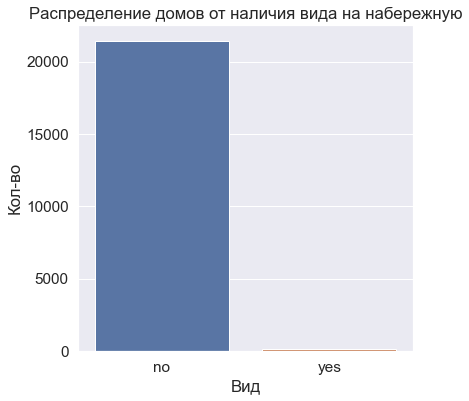

In [51]:
plt.figure(figsize=(6, 6))

sns.barplot(x=data['index'], y=data['waterfront'])

plt.title('Pаспределение домов от наличия вида на набережную')
plt.xlabel('Вид')
plt.ylabel('Кол-во');

Абсолютное большинство домов не имеют вида на набережную.

#### 2.2 Изучите распределение этажей домов


In [52]:
data = df['floors'].value_counts().reset_index()
data.head()

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161


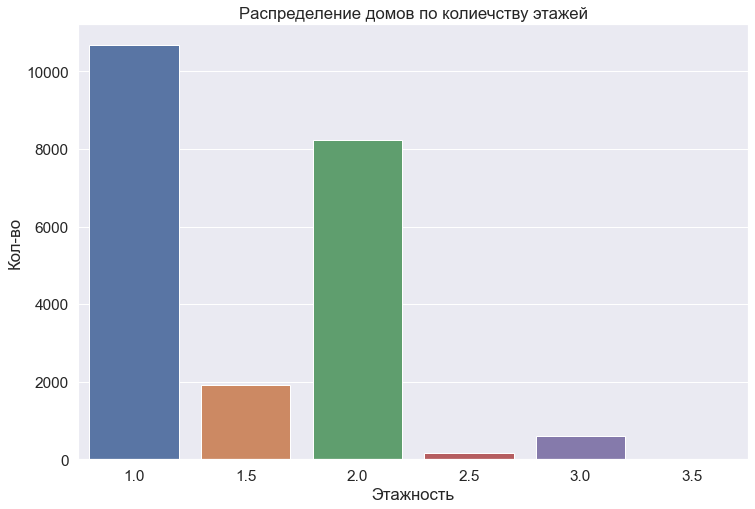

In [53]:
plt.figure(figsize=(12, 8))

sns.barplot(x=data['index'], y=data['floors'])

plt.title('Pаспределение домов по колиечству этажей')
plt.xlabel('Этажность')
plt.ylabel('Кол-во');

Большинство домов имеют 1 и 2 этажа.

#### 2.2 Изучите распределение состояния домов

In [54]:
data = df['condition'].value_counts().reset_index()
data.head()

,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


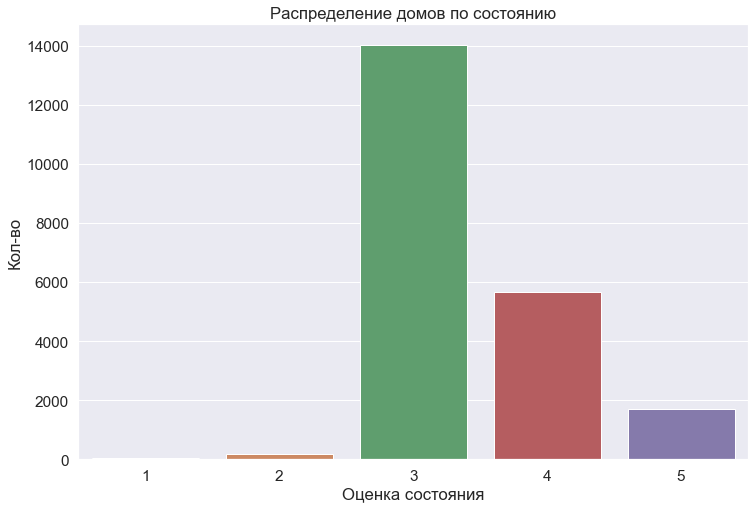

In [55]:
plt.figure(figsize=(12, 8))

sns.barplot(x=data['index'], y=data['condition'])

plt.title('Pаспределение домов по состоянию')
plt.xlabel('Оценка состояния')
plt.ylabel('Кол-во');

Большая часть домов в среднем (3) и в хорошем (4 и 5) состоянии.

### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [56]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


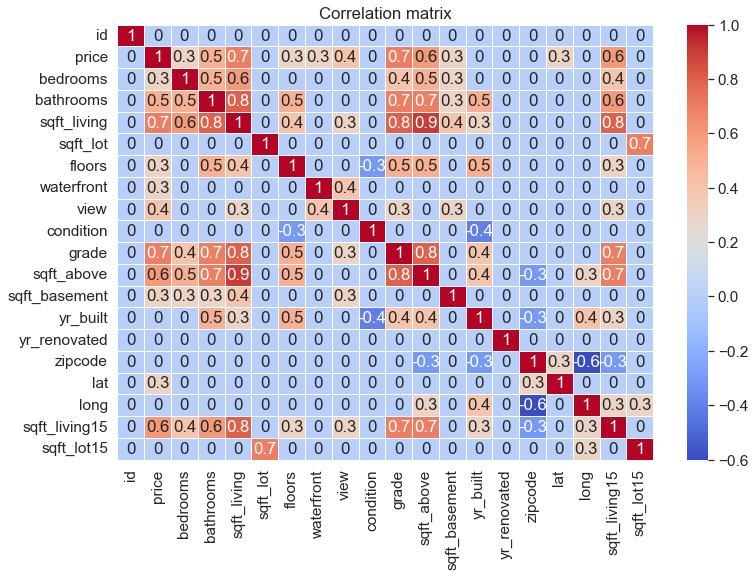

In [57]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

У признака price наблюдается сильная корреляционная (линейная) связь с признаками grade и sqft_living (0.7), признаками sqft_above	и sqft_living15 (0.6), признаком bathrooms (0.5)

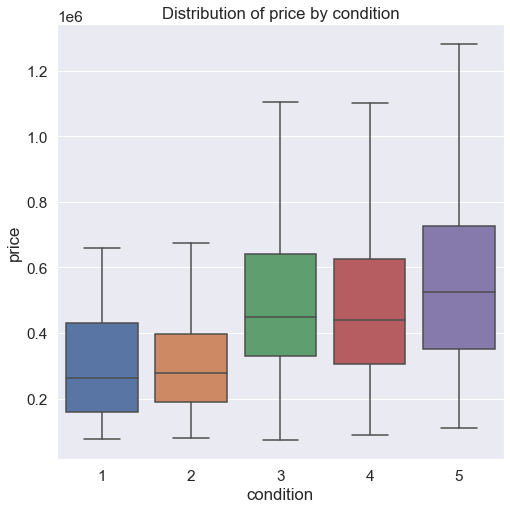

In [58]:
plt.figure(figsize=(8, 8))

sns.boxplot(x=df['condition'], y=df['price'], whis=1.5, showfliers=False)

plt.xlabel('condition')
plt.ylabel('price')
plt.title('Distribution of price by condition');

По графику видно, что цена выше у домов в хорошем состоянии (от 3 до 5)

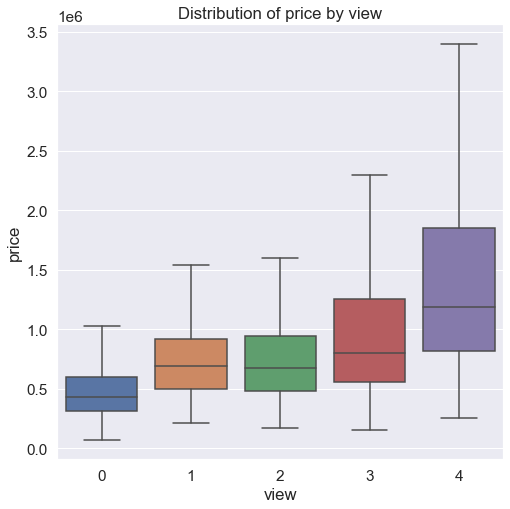

In [66]:
plt.figure(figsize=(8, 8))

sns.boxplot(x=df['view'], y=df['price'], whis=1.5, showfliers=False)
plt.title('Distribution of price by view');

По графику видно, что цена выше у домов c лучшим видом.

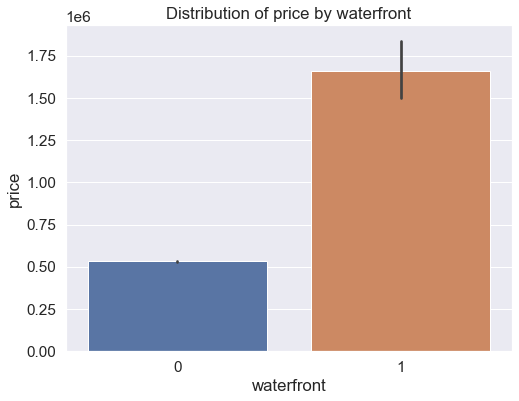

In [67]:
plt.figure(figsize=(8, 6))    
sns.barplot(x=df['waterfront'], y=df['price'])
plt.title('Distribution of price by waterfront');

По графику видно, что цена выше у домов видом на набережную.

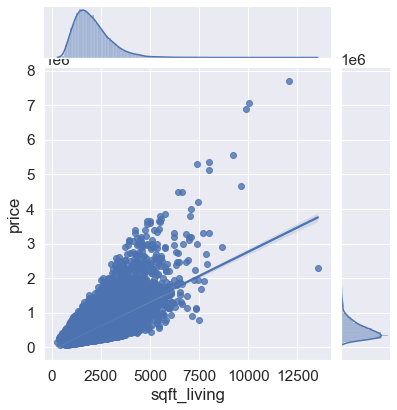

In [70]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

Видна линейная зависимость между жилой площадью и стоимостью.

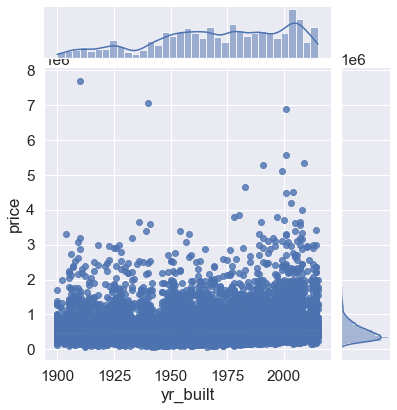

In [72]:
sns.jointplot(x=df['yr_built'], y=df['price'], kind='reg');

Между годом постройки дома и стоимостью квартир отсутсвует линейная связь.

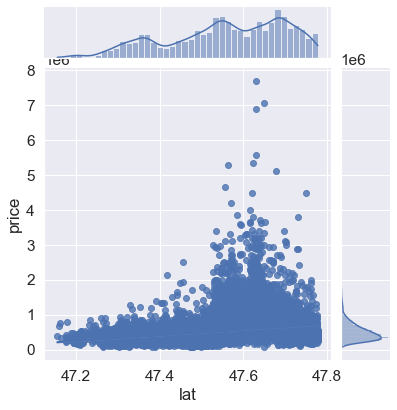

In [74]:
sns.jointplot(x=df['lat'], y=df['price'], kind='reg');

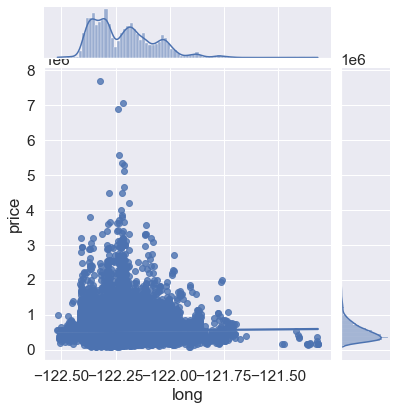

In [81]:
sns.jointplot(x=df['long'], y=df['price'], kind='reg');

Из графиков выше видны широта и долгота с большей ценой за жилье.